## Name - kumawat sachin omprakash

### Task - 1 : Predict the precentage of marks of an student based on the number of study hour.

### Question - What will be predicted score if a student studies for 9.25 hours / day ?


## Importing Libraries :-

In [67]:
# Here are the some libraries which is usefull in this task 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [68]:
# now, Here we are loading our dataset 
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [69]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Here we identifying some head and tail coount from the data so, we get to know about the data

In [31]:
data.head(3)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27


In [32]:
data.tail(3)

,Hours,Scores
22,3.8,35
23,6.9,76
24,7.8,86


In [33]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [70]:
# Here we are identifying some repeated values from the scroes
data["Scores"].value_counts()

30    3
95    1
62    1
85    1
86    1
67    1
24    1
69    1
17    1
41    1
42    1
75    1
47    1
76    1
81    1
20    1
21    1
54    1
88    1
25    1
27    1
60    1
35    1
Name: Scores, dtype: int64

### Here, we are simply ploting a scatter plot which gives us some idea about the data that how data is behaving

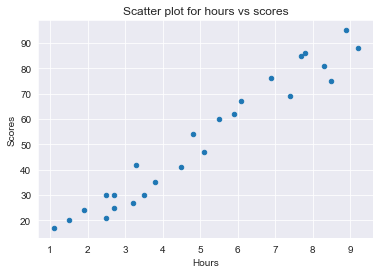

In [35]:
data.plot(kind='scatter', x='Hours', y='Scores')
plt.title("Scatter plot for hours vs scores")
plt.show()

### plotting regressor plot to determine the relationship between feature and target


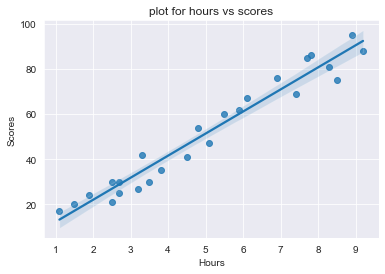

In [71]:
sns.regplot(x=data['Hours'],y=data['Scores'],data=data)
plt.title('plot for hours vs scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()


### This above plot indicates positive linear relationship as much as hours we can study is a chance of scoring high marks in the exam

#### Now, Here we are trying to splitting the data into two part i.e training and test data

In [48]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values
X 

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [49]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,test_size=0.2)

In [51]:
## We have Splitted Our Data Using 80:20 RULe(PARETO)
print("X train.shape =", X_train.shape)
print("Y train.shape =", Y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", Y_test.shape)

X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape  = (5, 1)
Y test.shape  = (5,)


### From, Here we are started to train our model

In [52]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [53]:
##Fitting Training Data
linreg.fit(X_train,Y_train)
print("Training our algorithm is finished")

Training our algorithm is finished


In [76]:
print("Intercept of line =",linreg.intercept_,"\nSlope line =",linreg.coef_)## β0 is Intercept & Slope of the line is β1.,"

Intercept of line = 2.018160041434662 
Slope line = [9.91065648]


In [56]:
Y0 = linreg.intercept_ + linreg.coef_*X_train

### plotting train data

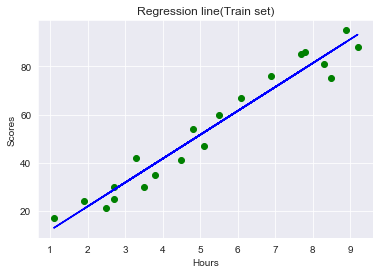

In [82]:

plt.scatter(X_train,Y_train,color='green')
plt.plot(X_train,Y0,color='blue')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Regression line(Train set)")
plt.show()

In [83]:
Y_pred=linreg.predict(X_test)##predicting the Scores for test data
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [59]:
#now print the Y_test.
Y_test

array([20, 27, 69, 30, 62], dtype=int64)

### plotting test data

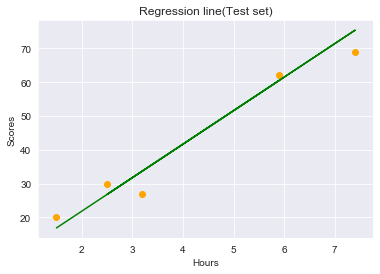

In [81]:

plt.plot(X_test,Y_pred,color='green')
plt.scatter(X_test,Y_test,color='orange')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Regression line(Test set)")
plt.show()

## Comparing Actual score with Predictted

In [61]:
Y_test1 = list(Y_test)
prediction=list(Y_pred)
df_compare = pd.DataFrame({ 'Actual':Y_test1,'Result':prediction})
df_compare

,Actual,Result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Checking the accuracy of a model :-

In [62]:
from sklearn import metrics
metrics.r2_score(Y_test,Y_pred)##Goodness of fit Test

0.9454906892105354

### Conlusion on accuracy of a model :-
   - so, from above result we ensure that our model work or perform his task with an accuracy of 94.54%

## So, Here now we are trying to predict our score w.r.t hours

In [75]:
Prediction_score = linreg.predict([[9.25]])
print("predicted score for a student studying 9.25 hours :",Prediction_score)

predicted score for a student studying 9.25 hours : [93.69173249]


## Conlusion for the student who want to score high marks :--

   - So, From the above result we can say that probably if a student studying 9 hours and above will score approximatly 94 %